In [29]:
import pandas as pd # Для работы с табличными данными
import numpy as np # Для работы с массивами

import matplotlib # Для отрисовки графиков
import matplotlib.pyplot as plt # Для отрисовки графиков

import sklearn
from sklearn import preprocessing, metrics
from sklearn.model_selection import GridSearchCV

# выбор темы картинок (необязательная строчка)
matplotlib.style.use('ggplot')


In [30]:
df = pd.read_csv('hotel_bookings.csv', sep = ',')
df['stays_in_weeks_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stays_in_weeks_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


In [31]:
df = df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 
              'stays_in_weekend_nights', 'stays_in_week_nights','reservation_status_date'], axis = 1)
df = df.drop_duplicates()
# df = df.dropna()
df

,hotel,is_canceled,lead_time,arrival_date_week_number,adults,children,babies,meal,country,market_segment,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stays_in_weeks_nights
0,Resort Hotel,0,342,27,2,0.0,0,BB,PRT,Direct,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,0
1,Resort Hotel,0,737,27,2,0.0,0,BB,PRT,Direct,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,0
2,Resort Hotel,0,7,27,1,0.0,0,BB,GBR,Direct,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,1
3,Resort Hotel,0,13,27,1,0.0,0,BB,GBR,Corporate,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,1
4,Resort Hotel,0,14,27,2,0.0,0,BB,GBR,Online TA,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,35,2,0.0,0,BB,BEL,Offline TA/TO,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,7
119386,City Hotel,0,102,35,3,0.0,0,BB,FRA,Online TA,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7
119387,City Hotel,0,34,35,2,0.0,0,BB,DEU,Online TA,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7
119388,City Hotel,0,109,35,2,0.0,0,BB,GBR,Online TA,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7


In [32]:
train_columns = ['lead_time', 'stays_in_weeks_nights', 'arrival_date_week_number', 'adr', 'total_of_special_requests']
train_df = df.sample(frac=0.3)
train_df

,hotel,is_canceled,lead_time,arrival_date_week_number,adults,children,babies,meal,country,market_segment,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stays_in_weeks_nights
3467,Resort Hotel,1,125,51,2,0.0,0,BB,PRT,Online TA,...,No Deposit,240.0,NaN,0,Transient,46.16,0,2,Canceled,10
87688,City Hotel,1,312,48,1,1.0,0,BB,PRT,Direct,...,No Deposit,NaN,NaN,0,Transient-Party,56.80,0,1,Canceled,1
38763,Resort Hotel,0,131,29,2,0.0,0,HB,BEL,Offline TA/TO,...,No Deposit,479.0,NaN,0,Transient,148.50,0,0,Check-Out,7
85813,City Hotel,0,8,16,1,0.0,0,BB,PRT,Aviation,...,No Deposit,NaN,153.0,0,Transient,110.00,0,2,Check-Out,3
108102,City Hotel,0,19,12,1,0.0,0,BB,SWE,Direct,...,No Deposit,NaN,NaN,0,Transient,95.00,0,0,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13966,Resort Hotel,0,2,25,2,0.0,0,BB,PRT,Direct,...,No Deposit,NaN,NaN,0,Transient,122.86,0,1,Check-Out,7
92297,City Hotel,0,54,28,3,0.0,0,BB,PRT,Online TA,...,No Deposit,9.0,NaN,0,Transient,159.30,1,2,Check-Out,1
112977,City Hotel,0,409,22,1,0.0,0,HB,GBR,Groups,...,No Deposit,229.0,NaN,0,Transient-Party,114.00,0,0,Check-Out,1
40993,City Hotel,0,5,33,2,0.0,0,BB,BEL,Direct,...,No Deposit,14.0,NaN,0,Transient,75.00,0,0,Check-Out,3


In [33]:
scaler = preprocessing.StandardScaler()
train_df[train_columns] = scaler.fit_transform(train_df[train_columns])
train_df[train_columns].describe().apply(lambda s: s.apply('{0:.6f}'.format))

,lead_time,stays_in_weeks_nights,arrival_date_week_number,adr,total_of_special_requests
count,26111.000000,26111.000000,26111.000000,26111.000000,26111.000000
mean,0.000000,-0.000000,0.000000,0.000000,0.000000
std,1.000019,1.000019,1.000019,1.000019,1.000019
min,-0.925948,-1.319874,-1.879017,-1.726052,-0.843242
25%,-0.796248,-0.590694,-0.855317,-0.555586,-0.843242
50%,-0.359986,-0.226104,0.022140,-0.132918,0.352928
75%,0.524329,0.503076,0.753354,0.452315,0.352928
max,7.763920,19.097168,1.923297,86.058917,5.137607


In [34]:
train_df

,hotel,is_canceled,lead_time,arrival_date_week_number,adults,children,babies,meal,country,market_segment,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stays_in_weeks_nights
3467,Resort Hotel,1,0.547911,1.777054,2,0.0,0,BB,PRT,Online TA,...,No Deposit,240.0,NaN,0,Transient,-0.975654,0,1.549097,Canceled,2.326026
87688,City Hotel,1,2.752802,1.557690,1,1.0,0,BB,PRT,Direct,...,No Deposit,NaN,NaN,0,Transient-Party,-0.802685,0,0.352928,Canceled,-0.955284
38763,Resort Hotel,0,0.618656,0.168383,2,0.0,0,HB,BEL,Offline TA/TO,...,No Deposit,479.0,NaN,0,Transient,0.688034,0,-0.843242,Check-Out,1.232256
85813,City Hotel,0,-0.831621,-0.782195,1,0.0,0,BB,PRT,Aviation,...,No Deposit,NaN,153.0,0,Transient,0.062160,0,1.549097,Check-Out,-0.226104
108102,City Hotel,0,-0.701921,-1.074681,1,0.0,0,BB,SWE,Direct,...,No Deposit,NaN,NaN,0,Transient,-0.181687,0,-0.843242,Check-Out,-0.590694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13966,Resort Hotel,0,-0.902366,-0.124103,2,0.0,0,BB,PRT,Direct,...,No Deposit,NaN,NaN,0,Transient,0.271218,0,0.352928,Check-Out,1.232256
92297,City Hotel,0,-0.289241,0.095261,3,0.0,0,BB,PRT,Online TA,...,No Deposit,9.0,NaN,0,Transient,0.863604,1,1.549097,Check-Out,-0.955284
112977,City Hotel,0,3.896516,-0.343467,1,0.0,0,HB,GBR,Groups,...,No Deposit,229.0,NaN,0,Transient-Party,0.127186,0,-0.843242,Check-Out,-0.955284
40993,City Hotel,0,-0.866993,0.460868,2,0.0,0,BB,BEL,Direct,...,No Deposit,14.0,NaN,0,Transient,-0.506817,0,-0.843242,Check-Out,-0.226104


In [9]:
!pip install yellowbrick

In [10]:
# Служебные функции
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as mp
from scipy.cluster.hierarchy import dendrogram


track_genres = pd.unique(df['is_canceled'])

def display_clustering_std(df, key_columns=None):
    """Requires 'cluster' column"""
    clusters = pd.unique(df['cluster'])
    for cluster in clusters:
        df_cluster = df[(df['cluster'] == cluster)]
        print(f"Cluster {cluster} ({df_cluster.shape})")

        if key_columns is not None:
            print(df_cluster[key_columns].describe())
        else:
            print(df_cluster.describe())

        value_counts = df_cluster['is_canceled'].value_counts()
        sorted_value_counts = value_counts.sort_values(ascending=False)
        print(sorted_value_counts.head(10))

def visualize_3d_clustering(df, x_column, y_column, z_column):
    """Requires 'cluster' column"""
    ax = mp.axes(projection='3d')
    clusters = pd.unique(df['cluster'])
    cmap = mp.cm.get_cmap('hsv', len(clusters))
    for i, cluster in enumerate(clusters):
        df_cluster = df[(df['cluster'] == cluster)]
        xdata = df_cluster[x_column]
        ydata = df_cluster[y_column]
        zdata = df_cluster[z_column]
        ax.scatter3D(xdata, ydata, zdata, cmap=cmap(i))
    mp.show()

def silhouette_score(estimator, X):
    clusters = estimator.fit_predict(X)
    score = metrics.silhouette_score(X, clusters)
    return score

def yb_plot_silhouette(X, model):
    """Supports only KMeans and MiniBatchKMeans"""
    visualizer = SilhouetteVisualizer(model, colormap='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

def plot_dendrogram(X, linkage='ward'):
    model = sklearn.cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=linkage)

    model = model.fit(X)
    mp.title("Hierarchical Clustering Dendrogram")

    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, truncate_mode="level", p=3)
    mp.xlabel("Number of points in node (or index of point if no parenthesis).")
    mp.show()


def plot_silhouette(X, cluster_labels):
    n_clusters = len(np.unique(cluster_labels))
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = mp.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = mp.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    mp.show()

In [103]:
from sklearn.cluster import KMeans
no_cv = [(slice(None), slice(None))]
kmeans = KMeans()
param_grid = dict(n_clusters=range(2, 5))
grid_search = GridSearchCV(kmeans, param_grid, cv=no_cv, scoring=silhouette_score)
grid_search.fit(train_df[train_columns])
train_df['cluster'] = grid_search.best_estimator_.labels_

print(f"Наилучшие параметры: {grid_search.best_params_}")
print(f"Коэффициент силуэта: {grid_search.best_score_}")

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Наилучшие параметры: {'n_clusters': 4}
Коэффициент силуэта: 0.22774501562803573


In [104]:
train_df['cluster'].value_counts()

2    8597
3    5962
1    5945
0    5607
Name: cluster, dtype: int64

In [105]:
display_clustering_std(train_df, ['lead_time', 'stays_in_weeks_nights', 'arrival_date_week_number'])

Cluster 0 ((5607, 28))
         lead_time  stays_in_weeks_nights  arrival_date_week_number
count  5607.000000            5607.000000               5607.000000
mean      1.441212               0.878752                  0.172486
std       0.935357               1.424202                  0.703727
min      -0.931430              -1.320191                 -1.887793
25%       0.851774              -0.231560                 -0.276158
50%       1.321038               0.494194                  0.163379
75%       1.989740               1.219949                  0.602916
max       6.447749              20.452436                  1.921527
0    3474
1    2133
Name: is_canceled, dtype: int64
Cluster 2 ((8597, 28))
         lead_time  stays_in_weeks_nights  arrival_date_week_number
count  8597.000000            8597.000000               8597.000000
mean     -0.467893              -0.316655                 -1.026443
std       0.494289               0.629876                  0.493351
min      -0.931430

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


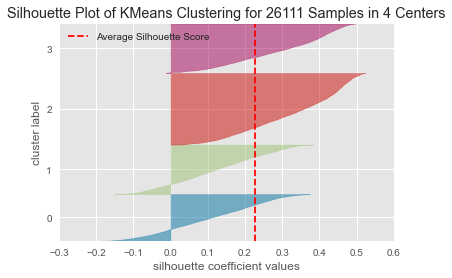

In [106]:
yb_plot_silhouette(train_df[train_columns], grid_search.best_estimator_)

C:\Users\admin\AppData\Local\Temp\ipykernel_9384\1084966478.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mp.cm.get_cmap('hsv', len(clusters))
C:\Users\admin\AppData\Local\Temp\ipykernel_9384\1084966478.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(xdata, ydata, zdata, cmap=cmap(i))


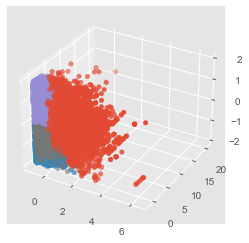

In [107]:
visualize_3d_clustering(train_df, 'lead_time', 'stays_in_weeks_nights', 'arrival_date_week_number')

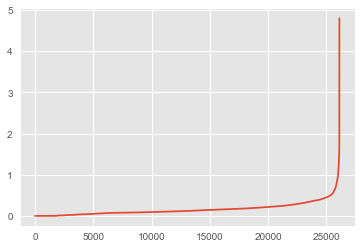

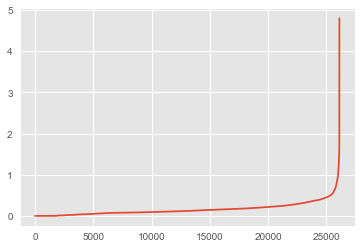

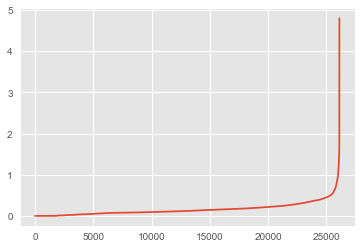

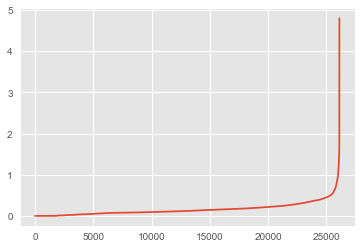

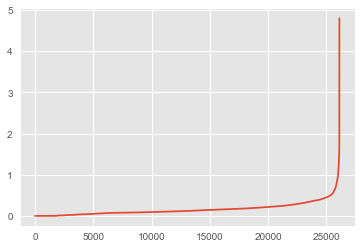

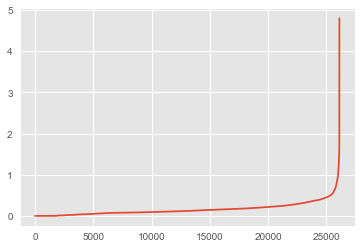

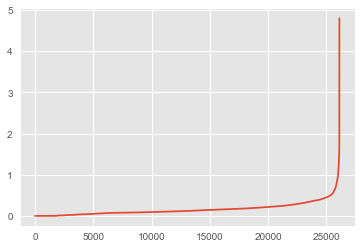

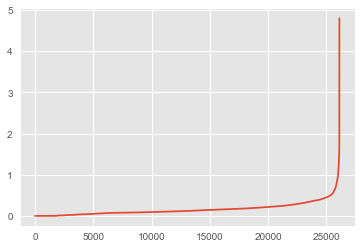

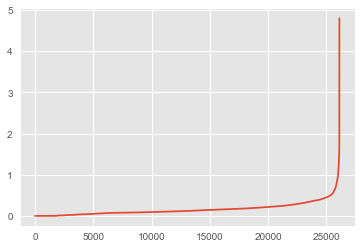

In [120]:
from sklearn.neighbors import NearestNeighbors

for min_samples in [i * len(train_columns) for i in range(1, 10)]:
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(train_df[train_columns])
    distances, indices = neighbors_fit.kneighbors(train_df[train_columns])
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    mp.plot(distances)
    mp.show()

In [123]:
from sklearn.cluster import DBSCAN

param_grid = dict(min_samples=[i * len(train_columns) for i in range(4, 9)])
dbscan = DBSCAN(eps=0.55)
grid_search = GridSearchCV(dbscan, param_grid, cv=no_cv, scoring=silhouette_score)
grid_search.fit(train_df[train_columns])
train_df['cluster'] = grid_search.best_estimator_.labels_

print(f"Наилучшие параметры: {grid_search.best_params_}")
print(f"Коэффициент силуэта: {grid_search.best_score_}")

Наилучшие параметры: {'min_samples': 40}
Коэффициент силуэта: 0.0657283055053541


In [124]:
train_df['cluster'].value_counts()

 1    11153
 0     7068
-1     5814
 2     2076
Name: cluster, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_9384\1084966478.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mp.cm.get_cmap('hsv', len(clusters))
C:\Users\admin\AppData\Local\Temp\ipykernel_9384\1084966478.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(xdata, ydata, zdata, cmap=cmap(i))


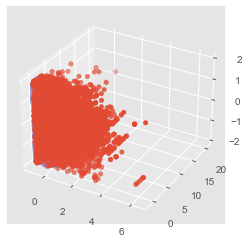

In [125]:
visualize_3d_clustering(train_df, 'lead_time', 'stays_in_weeks_nights', 'arrival_date_week_number')

In [126]:
display_clustering_std(train_df, ['lead_time', 'stays_in_weeks_nights', 'arrival_date_week_number'])

Cluster -1 ((5814, 28))
         lead_time  stays_in_weeks_nights  arrival_date_week_number
count  5814.000000            5814.000000               5814.000000
mean      0.855632               0.810510                  0.163909
std       1.287566               1.498535                  0.921352
min      -0.931430              -1.320191                 -1.887793
25%      -0.239265              -0.231560                 -0.495926
50%       0.710995               0.494194                  0.236636
75%       1.766839               1.219949                  0.749429
max       6.447749              20.452436                  1.921527
0    3899
1    1915
Name: is_canceled, dtype: int64
Cluster 0 ((7068, 28))
         lead_time  stays_in_weeks_nights  arrival_date_week_number
count  7068.000000            7068.000000               7068.000000
mean     -0.230687              -0.202809                 -0.041868
std       0.725260               0.618791                  0.984472
min      -0.93143

For n_clusters = 4 The average silhouette_score is : 0.0657283055053541


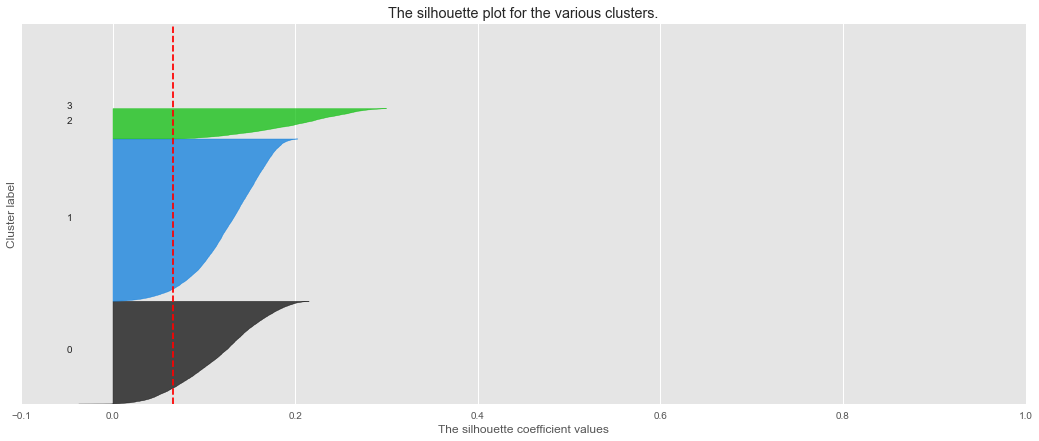

In [127]:
plot_silhouette(train_df[train_columns], train_df['cluster'])

In [131]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
param_grid = dict(linkage=['ward', 'complete', 'average', 'single'])
grid_search = GridSearchCV(agglomerative_clustering, param_grid, cv=no_cv, scoring=silhouette_score)
grid_search.fit(train_df[train_columns])
train_df['cluster'] = grid_search.best_estimator_.labels_

print(f"Наилучшие параметры: {grid_search.best_params_}")
print(f"Коэффициент силуэта: {grid_search.best_score_}")

Наилучшие параметры: {'linkage': 'average'}
Коэффициент силуэта: 0.8375503802771566


In [133]:
train_df['cluster'].value_counts()

0    26108
1        3
Name: cluster, dtype: int64

For n_clusters = 2 The average silhouette_score is : 0.8375503802771566


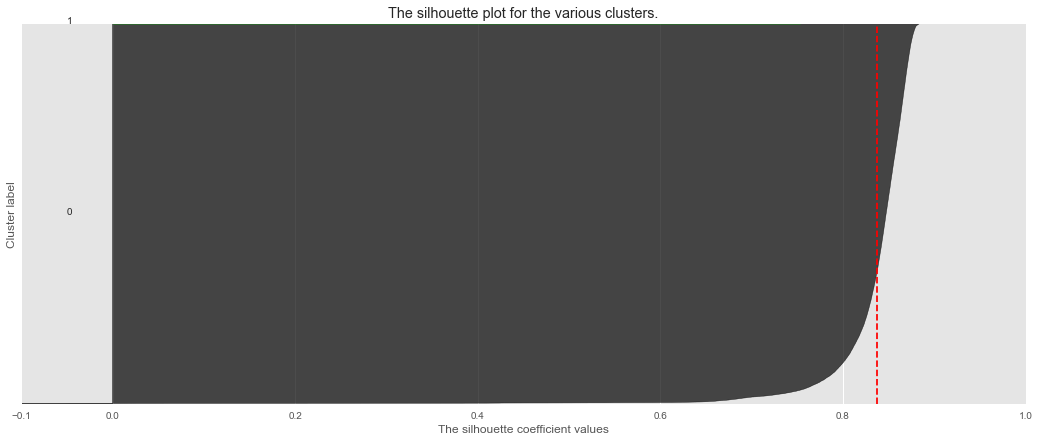

In [136]:
plot_silhouette(train_df[train_columns], train_df['cluster'])

In [135]:
display_clustering_std(train_df, ['lead_time', 'stays_in_weeks_nights', 'arrival_date_week_number'])

Cluster 0 ((26108, 28))
          lead_time  stays_in_weeks_nights  arrival_date_week_number
count  26108.000000           26108.000000              26108.000000
mean       0.000019              -0.002058                  0.000124
std        1.000061               0.981062                  0.999954
min       -0.931430              -1.320191                 -1.887793
25%       -0.790651              -0.594437                 -0.788951
50%       -0.368313              -0.231560                  0.016867
75%        0.535021               0.494194                  0.749429
max        6.447749              11.380508                  1.921527
0    18956
1     7152
Name: is_canceled, dtype: int64
Cluster 1 ((3, 28))
       lead_time  stays_in_weeks_nights  arrival_date_week_number
count   3.000000               3.000000                  3.000000
mean   -0.168876              17.912296                 -1.081975
std     0.601409               3.225322                  1.205948
min    -0.802382 

C:\Users\admin\AppData\Local\Temp\ipykernel_9384\1084966478.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mp.cm.get_cmap('hsv', len(clusters))
C:\Users\admin\AppData\Local\Temp\ipykernel_9384\1084966478.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(xdata, ydata, zdata, cmap=cmap(i))


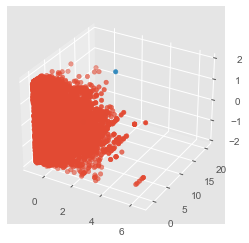

In [137]:
visualize_3d_clustering(train_df, 'lead_time', 'stays_in_weeks_nights', 'arrival_date_week_number')

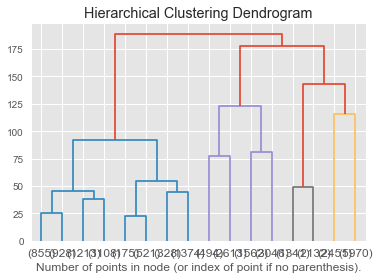

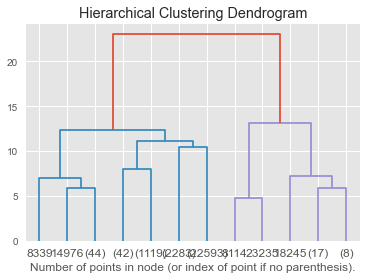

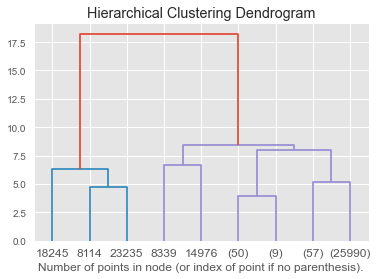

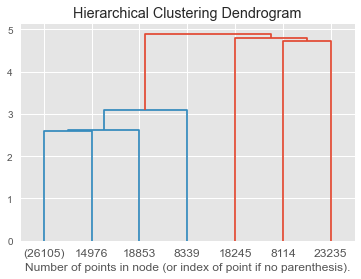

In [134]:
for linkage in ['ward', 'complete', 'average', 'single']:
    plot_dendrogram(train_df[train_columns], linkage=linkage)

In [43]:
from sklearn.cluster import KMeans
no_cv = [(slice(None), slice(None))]
kmeans = KMeans(n_clusters = 2)

param_grid = dict(n_clusters=range(2, 3))
grid_search = GridSearchCV(kmeans, param_grid, cv=no_cv, scoring=silhouette_score)
grid_search.fit(train_df[train_columns])
train_df['cluster'] = grid_search.best_estimator_.labels_


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
train_df['cluster'].value_counts()

1    17653
0     8458
Name: cluster, dtype: int64

In [19]:
display_clustering_std(train_df, ['lead_time', 'stays_in_weeks_nights', 'arrival_date_week_number'])

Cluster 1 ((17653, 28))
          lead_time  stays_in_weeks_nights  arrival_date_week_number
count  17653.000000           17653.000000              17653.000000
mean      -0.513399              -0.363607                 -0.129463
std        0.443425               0.548275                  1.069236
min       -0.931381              -1.307394                 -1.887925
25%       -0.873157              -0.950749                 -1.006664
50%       -0.663553              -0.594104                 -0.272280
75%       -0.279278               0.119187                  0.755858
max        1.828412               2.972349                  1.930873
0    13575
1     4078
Name: is_canceled, dtype: int64
Cluster 0 ((8458, 28))
         lead_time  stays_in_weeks_nights  arrival_date_week_number
count  8458.000000            8458.000000               8458.000000
mean      1.071535               0.758897                  0.270208
std       0.989232               1.268106                  0.770192
min   

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


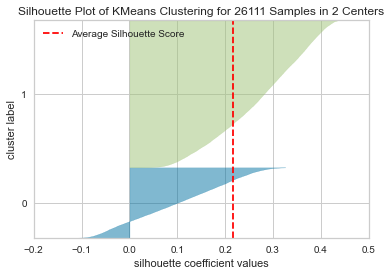

In [20]:
yb_plot_silhouette(train_df[train_columns], grid_search.best_estimator_)


C:\Users\admin\AppData\Local\Temp\ipykernel_5516\1084966478.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mp.cm.get_cmap('hsv', len(clusters))
C:\Users\admin\AppData\Local\Temp\ipykernel_5516\1084966478.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(xdata, ydata, zdata, cmap=cmap(i))


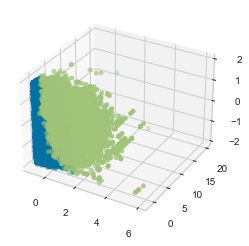

In [21]:
visualize_3d_clustering(train_df, 'lead_time', 'stays_in_weeks_nights', 'arrival_date_week_number')

In [23]:
import seaborn as sns

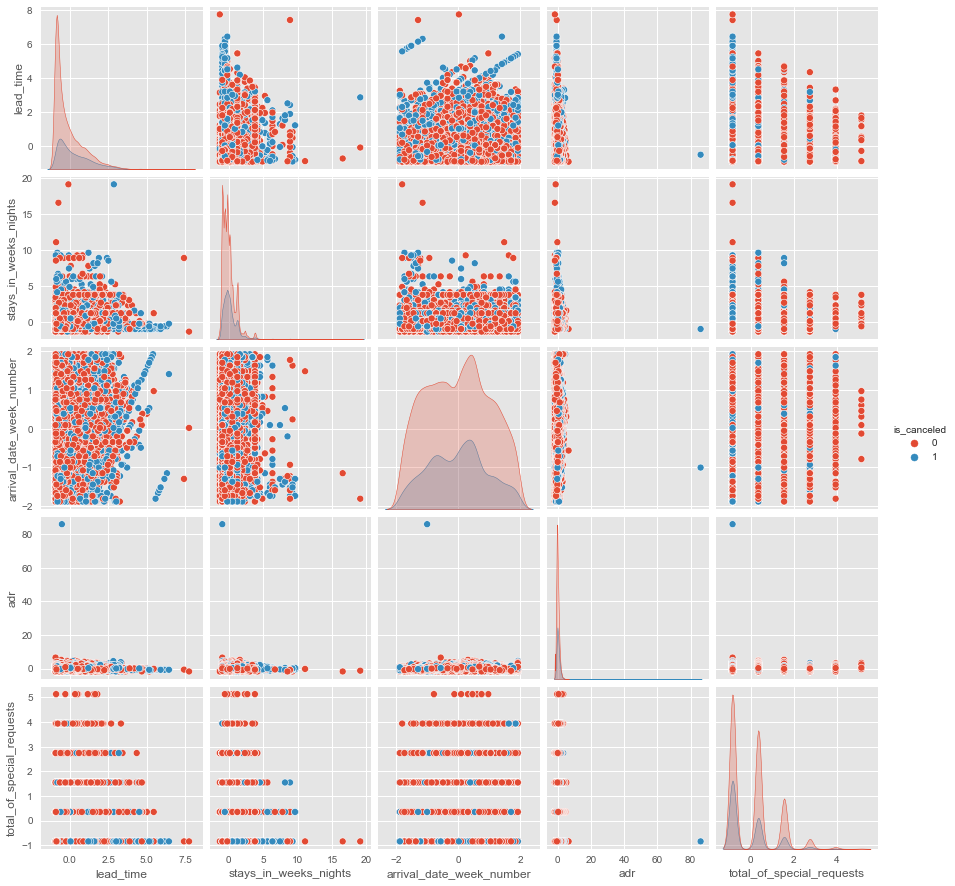

In [41]:
sns.pairplot(train_df[['lead_time', 'stays_in_weeks_nights', 
                       'arrival_date_week_number', 'adr', 'total_of_special_requests', 'is_canceled']], 
             hue = 'is_canceled')

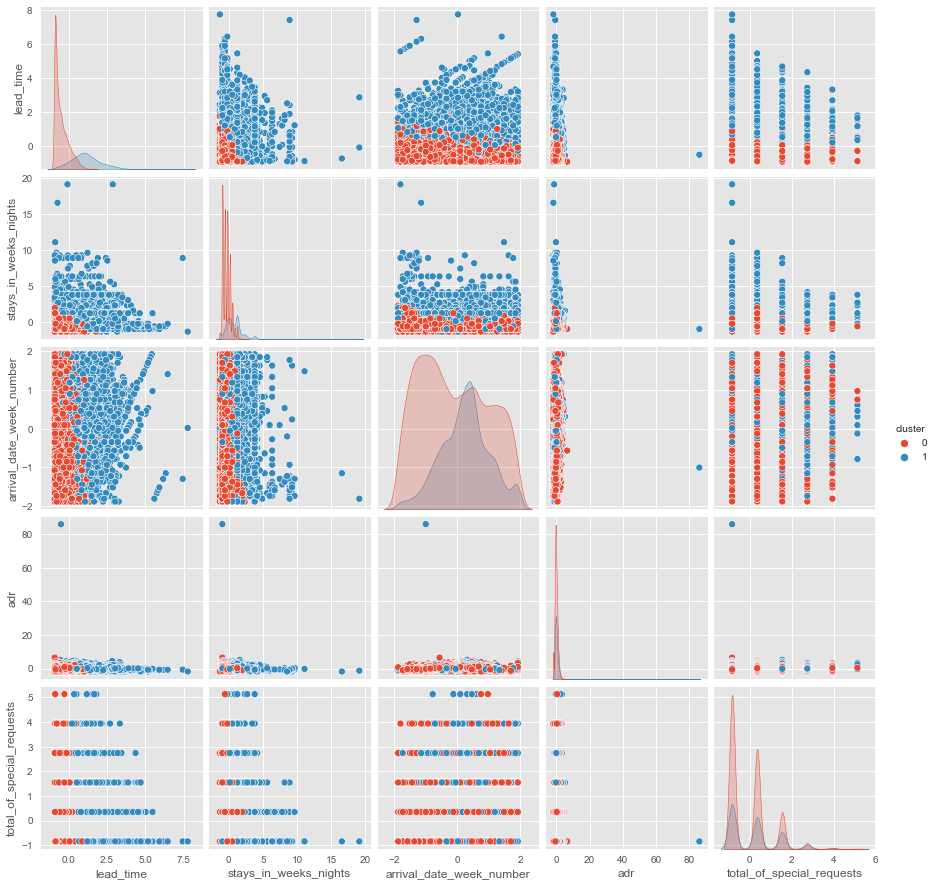

In [78]:
sns.pairplot(train_df[['lead_time', 'stays_in_weeks_nights', 
                       'arrival_date_week_number', 'adr', 'total_of_special_requests', 'cluster']], 
             hue = 'cluster')

In [77]:

new_df = pd.concat([train_df[train_df['is_canceled'] == 0], train_df[train_df['is_canceled'] == 1]])
new_df=new_df.dropna(subset=['is_canceled'])
print(len(new_df))

colors = ['#377eb8'] * len(new_df[new_df['is_canceled'] == 0]) + ['#e41a1c'] * len(new_df[new_df['is_canceled'] == 1])

print(len(new_df[new_df['is_canceled'] == 0]))
print(len(new_df[new_df['is_canceled'] == 1]))

print(len(new_df))

26111
19106
7005
26111


ValueError: 'c' argument has 26111 elements, which is inconsistent with 'x' and 'y' with size 26108.

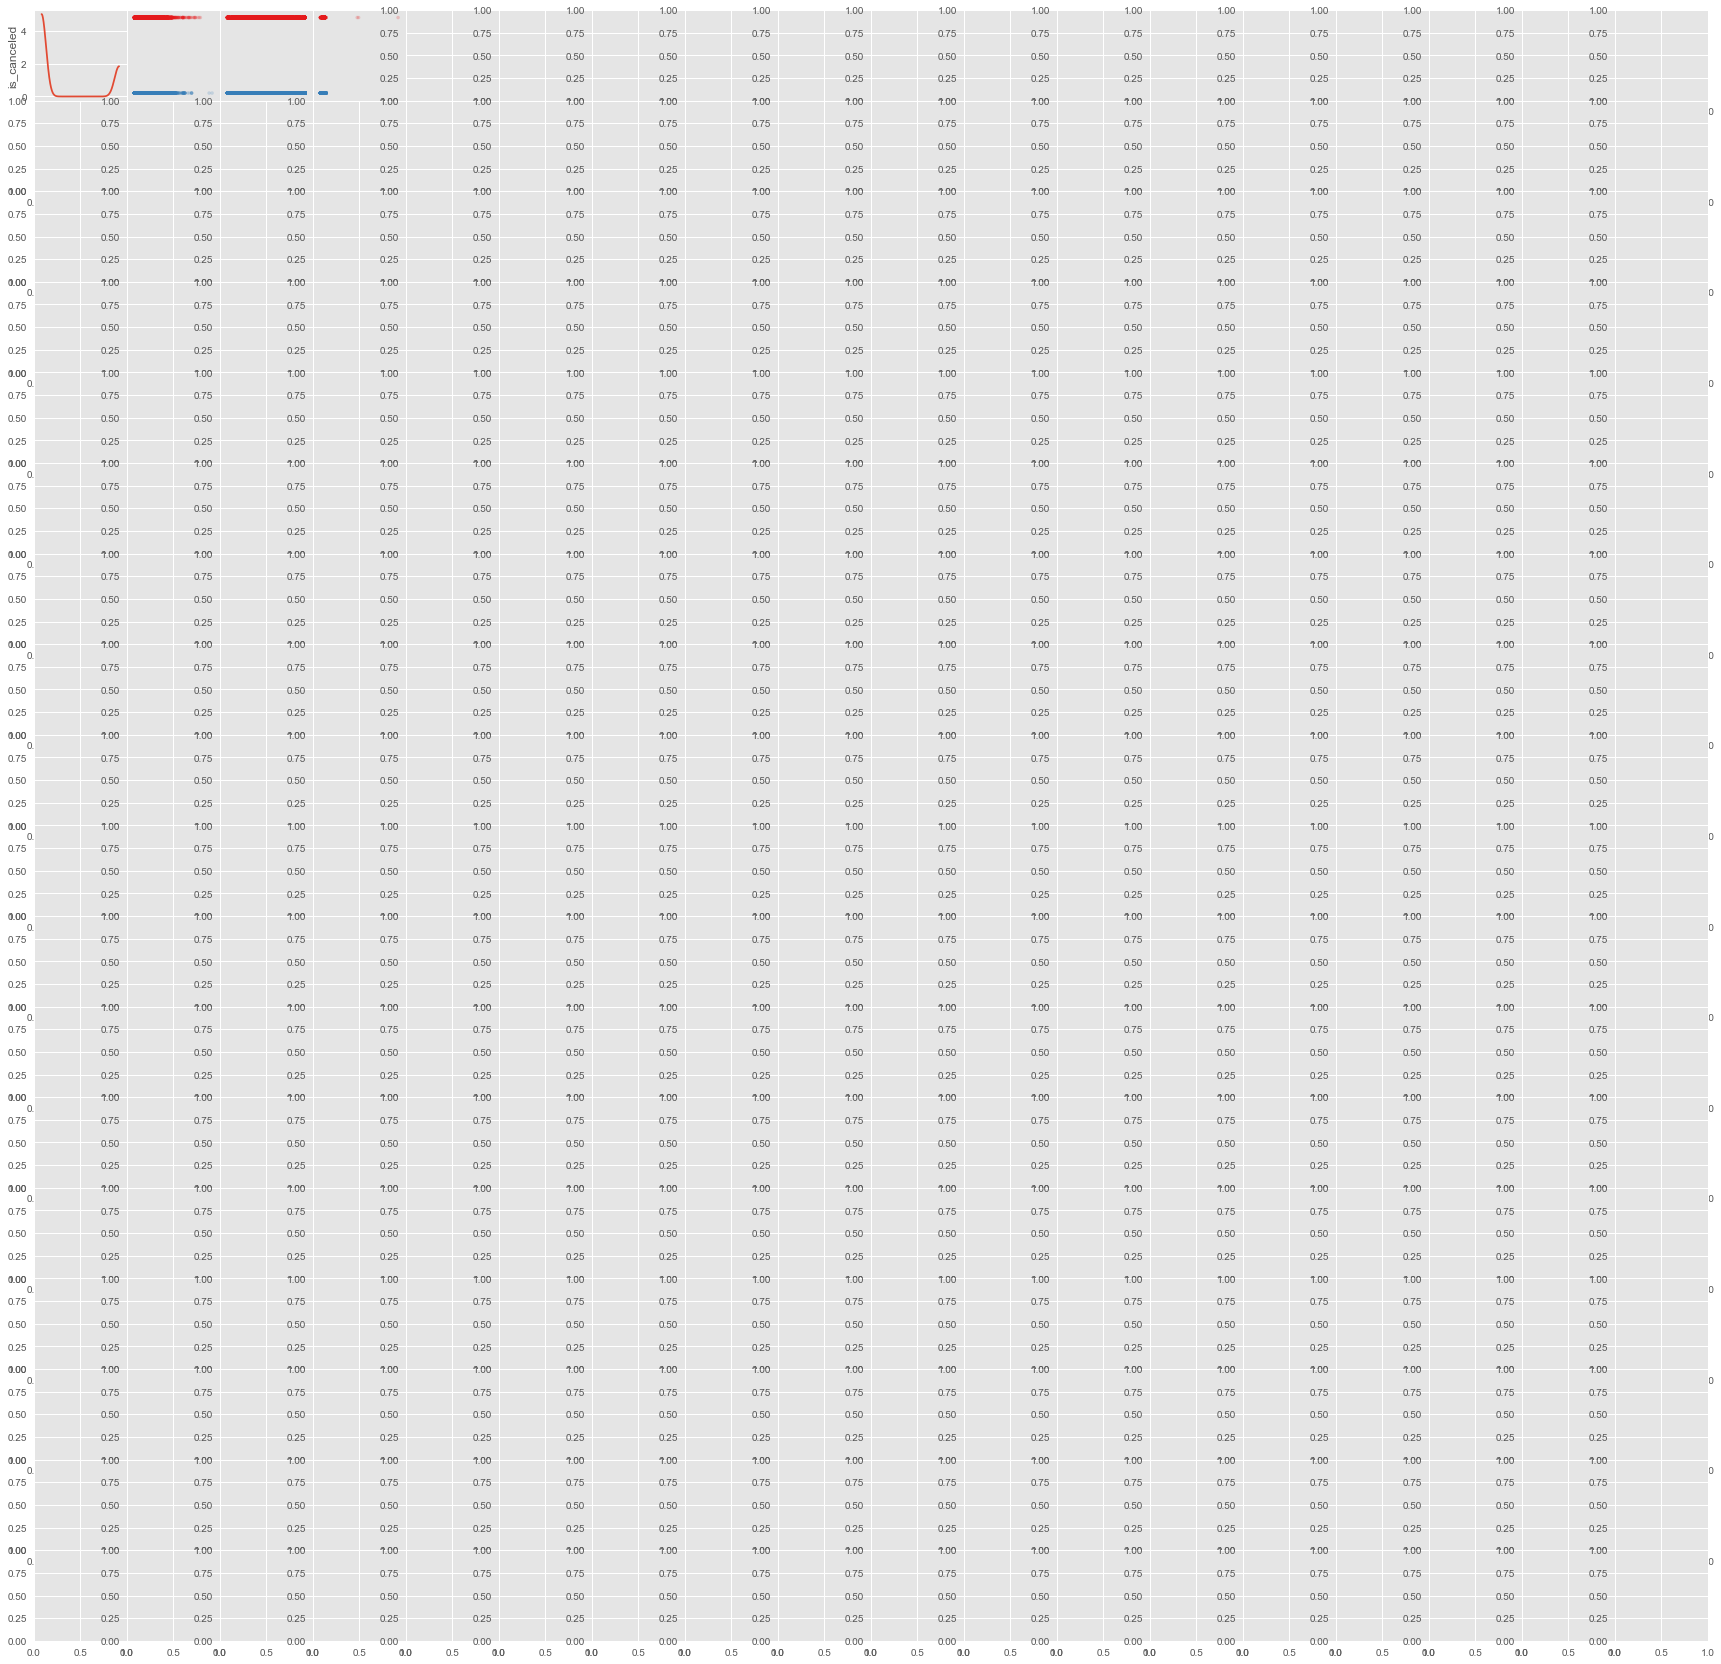

In [70]:
from pandas.plotting import scatter_matrix
# scatter_matrix(df, alpha=.2, figsize=(30, 30), diagonal='kde'])
axes = scatter_matrix(new_df, alpha=.2, figsize=(30, 30), range_padding=.2, diagonal='kde', color=colors)
plt.suptitle('Двумерный анализ переменных', fontsize=16, y=.89)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(30)
    ax.yaxis.label.set_rotation(30)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.label.set_ha('right')

In [38]:
from pandas.plotting import scatter_matrix

new_df = 

colors = ['#377eb8'] * 1000 + ['#e41a1c'] * 1000

# scatter_matrix(df, alpha=.2, figsize=(30, 30), diagonal='kde'])
axes = scatter_matrix(new_df, alpha=.2, figsize=(30, 30), range_padding=.2, diagonal='kde', color=colors)
plt.suptitle('Двумерный анализ переменных', fontsize=16, y=.89)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(30)
    ax.yaxis.label.set_rotation(30)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.label.set_ha('right')
    

SyntaxError: invalid syntax (2282977307.py, line 3)